In [123]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../.')
import datasets

In [124]:
sample_size = 200
feature_dimension = 50
# Sample wise double descent for linear model only affected by input Dimension, even if some of input is disturbance (useless) term
used_feature = feature_dimension
noise_level = 0
bias = 10
y_dimension = 1
test_size = 0.5
# set a random seed (int) if you want to the datasets to be fixed
RAND_ST = None

X, y = datasets.linear_regression_with_gaussian(sample_size=sample_size, feautre_size=feature_dimension, used_feature=used_feature, noise_level=noise_level, bias=bias, y_dimension=y_dimension, random_state=RAND_ST)

# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

# X = np.column_stack((np.ones(sample_size), X))
weight = np.random.random((X.shape[1], y_dimension))
y = 1 / (1 + np.exp(-1 * X.dot(weight)))
y[y >= 0.5] = 1
y[y < 0.5] = 0
y = y.reshape(sample_size)

Noiseless Data

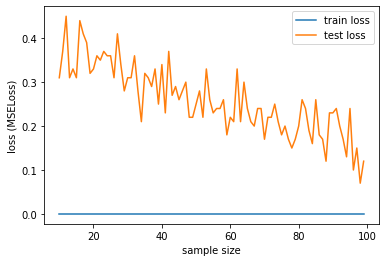

In [125]:
train_losses = []
test_losses = []

samples = [sample for sample in range(10, int(sample_size/2), 1)]

for sample in samples:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = LogisticRegression(penalty='none', solver='lbfgs', multi_class='ovr').fit(X_train[:sample], y_train[:sample])
    # model = SGDClassifier(loss="log_loss", penalty="none", validation_fraction=0.0000001).fit(X_train[:sample], y_train[:sample])
    
    train_losses.append(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    # print(np.sum(np.power(model.predict(X_test) - y_test, 2)) / X_test.shape[0])
    # print(sample)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("sample size")
plt.ylabel("loss (MSELoss)")
plt.plot(samples, train_losses, label = "train loss")
plt.plot(samples, test_losses, label = "test loss")
plt.legend()
plt.show()

Noisy Data

In [126]:
X = X + np.random.normal(0, 0.3, (sample_size, X.shape[1]))

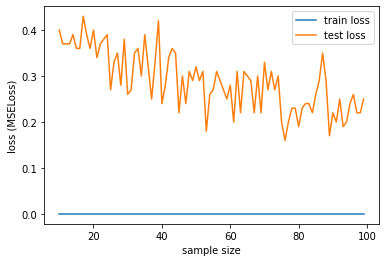

In [127]:
train_losses = []
test_losses = []

samples = [sample for sample in range(10, int(sample_size/2), 1)]

for sample in samples:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RAND_ST, shuffle=True)
    model = LogisticRegression(penalty='none', solver='lbfgs', multi_class='ovr').fit(X_train[:sample], y_train[:sample])
    # model = SGDClassifier(loss="log_loss", penalty="none", validation_fraction=0.0000001).fit(X_train[:sample], y_train[:sample])
    
    train_losses.append(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    test_losses.append(np.sum(np.power(model.predict(X_test)-y_test, 2)) / X_test.shape[0])
    
    # print(np.sum(np.power(model.predict(X_train[:sample])-y_train[:sample], 2)) / sample)
    # print(np.sum(np.power(model.predict(X_test) - y_test, 2)) / X_test.shape[0])
    # print(sample)
    # print()

# lowestIndex = np.argsort(test_losses)

plt.xlabel("sample size")
plt.ylabel("loss (MSELoss)")
plt.plot(samples, train_losses, label = "train loss")
plt.plot(samples, test_losses, label = "test loss")
plt.legend()
plt.show()